<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


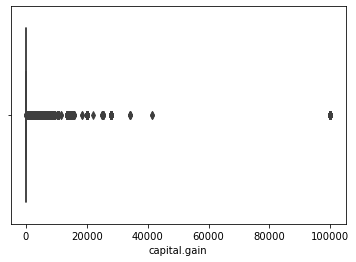

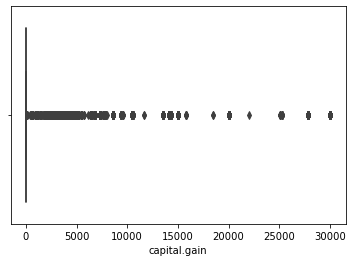

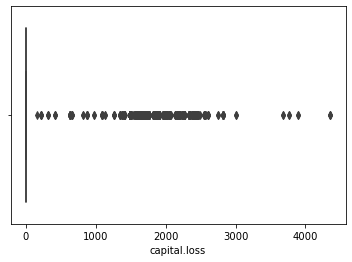

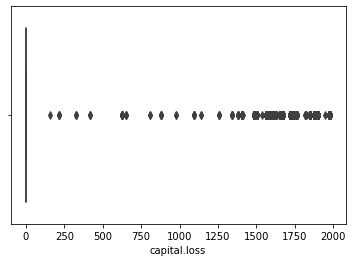

In [1]:
%run DataPreprocessing.ipynb

## Model Building

In [2]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [3]:
xgb_clf= xgb.XGBClassifier(n_estimators=250,learning_rate=0.1,random_state=0)

In [4]:
params= {'max_depth':range(3,10,2), 'gamma':[0.1,0.2,0.3], 'subsample':[0.8,0.9], 'colsample_bytree':[0.8,0.9],'reg_alpha':[0.01,0.1,1]}

In [5]:
gscv= GridSearchCV(xgb_clf,params,n_jobs=-1,cv=5,verbose=1,scoring='accuracy')

In [6]:
gscv.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 33.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 56.0min finished


[22:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=250, n_jobs=None,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, val

In [7]:
gscv.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'max_depth': 5,
 'reg_alpha': 1,
 'subsample': 0.9}

In [8]:
best_xgb= gscv.best_estimator_

In [9]:
y_train_pred= best_xgb.predict(X_train)
y_test_pred= best_xgb.predict(X_test)

## Model Evaluation

In [10]:
from sklearn import metrics

In [11]:
metrics.accuracy_score(y_train,y_train_pred)

0.890970515970516

In [12]:
metrics.confusion_matrix(y_test,y_test_pred)

array([[4674,  292],
       [ 562,  985]], dtype=int64)

In [13]:
metrics.accuracy_score(y_test,y_test_pred)

0.8688776293566712